In [17]:
#basic import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import shutil
import seaborn
# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# tensorflow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Create the directory if it doesn't exist
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Move the file from your current folder to ~/.kaggle
shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Secure it (Kaggle requires this)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

In [4]:
#import dataset
import kagglehub

#Downlaod latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

c:\School\Artifical Intelligence\AI-Betts-Group-7\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\jyang\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1


In [5]:
#read in files
train_dr = path + "\Training"
test_dr = path + "\Testing"

In [6]:
def get_data_labels(directory):
    paths = []
    labels = []
    for label_name in os.listdir(directory):
        class_dir = os.path.join(directory, label_name)
        if os.path.isdir(class_dir):
            for filename in os.listdir(class_dir):
                file_path = os.path.join(class_dir, filename)
                paths.append(file_path)
                labels.append(label_name)
    return paths, labels

#get data from files
train_paths, train_labels = get_data_labels(train_dr)
test_paths, test_labels = get_data_labels(test_dr)

#print information
print(train_dr)
print('Training Info:')
print(f'Number of Paths: {len(train_paths)}')
print(f'Number of Labels: {len(train_labels)}')
print(test_dr)
print('Testing Info:')
print(f'Number of Paths: {len(test_paths)}')
print(f'Number of Labels: {len(test_labels)}')

C:\Users\jyang\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Training
Training Info:
Number of Paths: 5712
Number of Labels: 5712
C:\Users\jyang\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Testing
Testing Info:
Number of Paths: 1311
Number of Labels: 1311


In [7]:
#load train data
def train_df():
    classes, class_paths = zip(*[(label, os.path.join(train_dr, label, image))
                                 for label in os.listdir(train_dr) if os.path.isdir(os.path.join(train_dr, label))
                                 for image in os.listdir(os.path.join(train_dr, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [8]:
#load test data
def test_df():
    classes, class_paths = zip(*[(label, os.path.join(test_dr, label, image))
                                 for label in os.listdir(test_dr) if os.path.isdir(os.path.join(test_dr, label))
                                 for image in os.listdir(os.path.join(test_dr, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [9]:
train_df()

,Class Path,Class
0,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
1,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
2,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
3,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
4,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
...,...,...
5707,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary
5708,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary
5709,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary
5710,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary


In [11]:
test_df()

,Class Path,Class
0,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
1,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
2,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
3,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
4,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
...,...,...
1306,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary
1307,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary
1308,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary
1309,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary


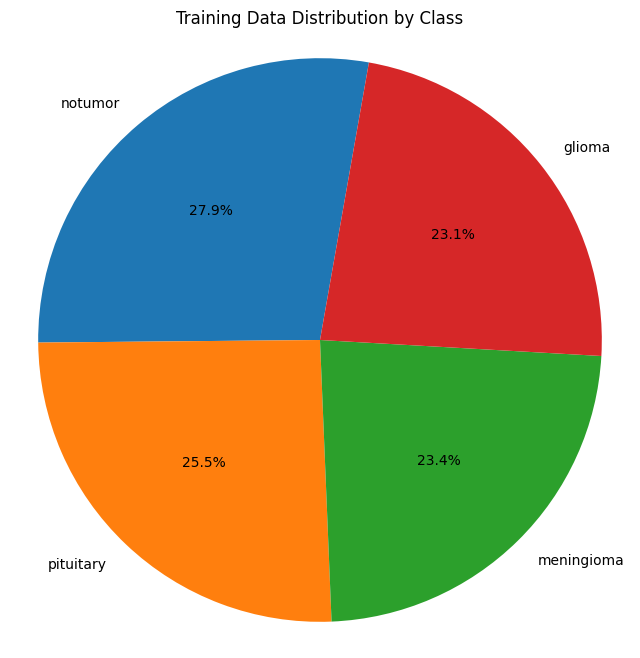

In [13]:
#Visualize Training Data Distribution of Training Data
tr_df = train_df() # call function to get dataframe
class_counts = tr_df['Class'].value_counts()

#Create Viusal Distribution of Data (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=80)
plt.title('Training Data Distribution by Class')
plt.axis('equal')
plt.show()

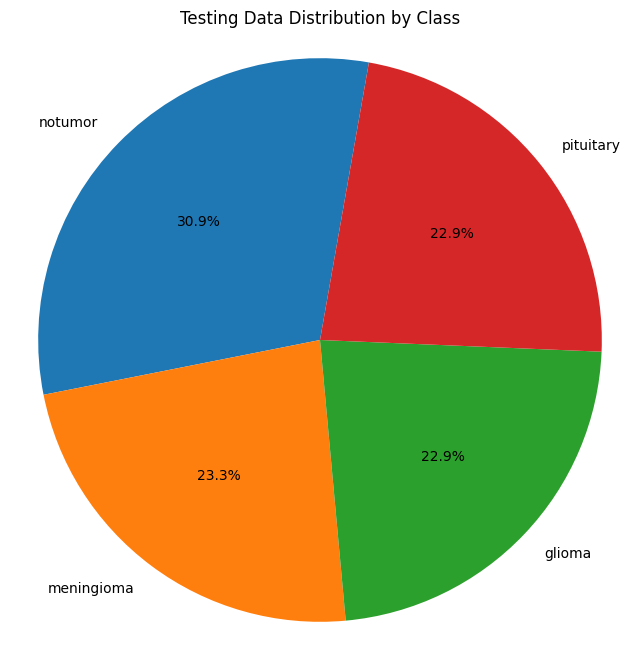

In [14]:
#Visualize Training Data Distribution of Testing Data
ts_df = test_df() # call function to get dataframe
class_counts = ts_df['Class'].value_counts()

#Create Viusal Distribution of Data (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=80)
plt.title('Testing Data Distribution by Class')
plt.axis('equal')
plt.show()

In [18]:
#split data into train, test, valid
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, random_state=20, stratify=ts_df['Class'])

In [22]:
valid_df

,Class Path,Class
286,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
318,C:\Users\jyang\.cache\kagglehub\datasets\masou...,meningioma
1072,C:\Users\jyang\.cache\kagglehub\datasets\masou...,pituitary
373,C:\Users\jyang\.cache\kagglehub\datasets\masou...,meningioma
109,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
...,...,...
59,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
860,C:\Users\jyang\.cache\kagglehub\datasets\masou...,notumor
273,C:\Users\jyang\.cache\kagglehub\datasets\masou...,glioma
494,C:\Users\jyang\.cache\kagglehub\datasets\masou...,meningioma


In [25]:
#Data Preprocessing
batch_size = 32
img_size = (299,299)

_gen = ImageDataGenerator(rescale=1/255, brightness_range= (0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = _gen.flow_from_dataframe(tr_df, x_col = 'Class Path',
                                  y_col = 'Class', batch_size = batch_size,
                                  target_size = img_size)

valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                     y_col = 'Class', batch_size = batch_size,
                                     target_size = img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                    y_col='Class', batch_size = 16,
                                    target_size = img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
#Get Samples from dataset
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(ts_gen)

plt.figure(figsize=(20,20))

for i, (image, label) in enumerate(zip(images, labels)):
    plt.subplot(4,4, i + 1)
    plt.imshow(image)
    class_name = classes[np.argmax(label)]
    plt.title(class_name, color='k', fontsize=15)
    
plt.show()